In [1]:
%matplotlib inline
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
import pandas as pd

# 1 Cotización

In [2]:
cot_all = pd.read_excel('..\\..\\Datos\\working\\cotizaciones_all.xlsx')
print(cot_all.shape)
cot_all.head()

(16592, 41)


,ID,Fecha Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Presencial,Remoto,Jefe Comercial,...,Razon Social,Giro,Nacionalidad,N° Grupo Familiar,Actividad,Cargo,Situacion Laboral,Empleador,Antiguedad Laboral,Profesión
0,111502,2017-07-27 15:46:54,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TB-104,Est-65",Si,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,3,Tecnico,NaN,NaN,NaN,0.0,NaN
1,111611,2017-07-29 13:37:05,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-02",No,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,Sin Información,Empleado,NaN,NaN,NaN,0.0,NaN
2,111629,2017-07-29 16:41:15,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-303,Est-01",Si,No,Alejandra Pooley Flores,...,NaN,NaN,NaN,3,Empleado,NaN,NaN,NaN,0.0,NaN
3,111766,2017-07-31 11:01:57,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-06",No,No,Alejandra Pooley Flores,...,NaN,NaN,Chilena,Sin Información,Empleado,a,Sin Información,a,1.0,Empresario
4,111794,2017-07-31 15:52:32,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TA-604,Est-01",Si,No,Alejandra Pooley Flores,...,NaN,NaN,Chilena,4,Profesional,NaN,NaN,NaN,0.0,Constructor Civil


In [3]:
cot_all.columns

Index(['ID', 'Fecha Cotizacion', 'Medio', 'Tipo de Medio', 'Proyecto', 'Etapa',
       'Productos', 'Presencial', 'Remoto', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'RUT', 'Nombre', 'Apellido 1', 'Apellido 2',
       'Nombre Completo', 'Telefono', 'Celular', 'Direccion', 'Region',
       'Provincia', 'Comuna', 'Correo Electronico', 'Sexo', 'Estado Civil',
       'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente', 'Razon Social',
       'Giro', 'Nacionalidad', 'N° Grupo Familiar', 'Actividad', 'Cargo',
       'Situacion Laboral', 'Empleador', 'Antiguedad Laboral', 'Profesión'],
      dtype='object')

In [4]:
g = cot_all.columns.to_series().groupby(cot_all.dtypes).groups
for key in g.keys():
    print('Key: ',key)
    print('Total attributes: ',len(g[key]))

Key:  int64
Total attributes:  1
Key:  datetime64[ns]
Total attributes:  2
Key:  float64
Total attributes:  4
Key:  object
Total attributes:  34


## 1.1 Utils

In [5]:
#Variables categoricas
def ver_atributo_categorico(df,col,limit=False,lim=10,log=False,hue=None,palette=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(l_len,l)
    
    sb.set_color_codes("muted")
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

## 1.2 Categorical Exploration

### 1.2.1 Medio

0


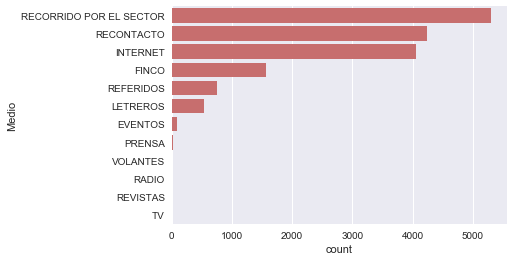

In [6]:
print(cot_all.Medio.isnull().sum())
ver_atributo_categorico(cot_all,'Medio')

### 1.2.2 Tipo Medio

0


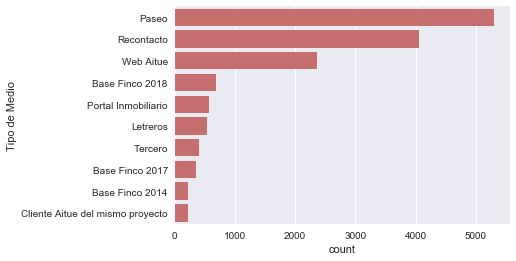

In [7]:
print(cot_all.Proyecto.isnull().sum())
ver_atributo_categorico(cot_all,'Tipo de Medio',lim=10,limit=True)

### 1.2.3 Proyecto

0


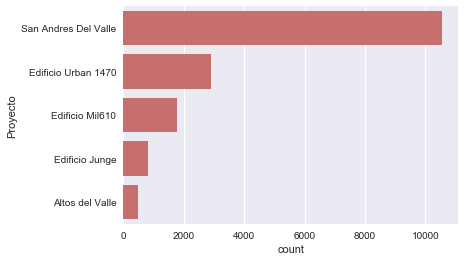

In [8]:
print(cot_all.Proyecto.isnull().sum())
ver_atributo_categorico(cot_all,'Proyecto')

### 1.2.4 Proyecto

Valores nulos:  1869


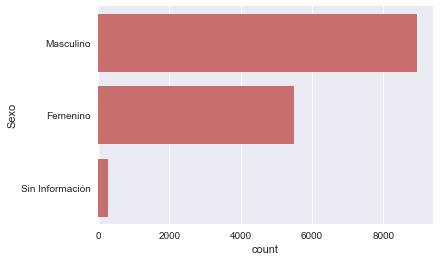

In [9]:
print('Valores nulos: ',cot_all.Sexo.isnull().sum())
ver_atributo_categorico(cot_all,'Sexo')

### 1.2.5 Remoto

3310


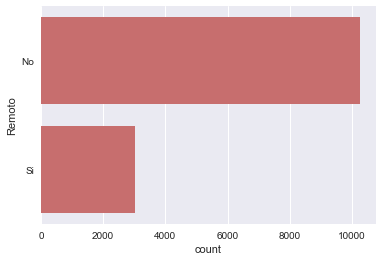

In [10]:
print(cot_all.Remoto.isnull().sum())
ver_atributo_categorico(cot_all,'Remoto')

### 1.2.6 Presencial

2027


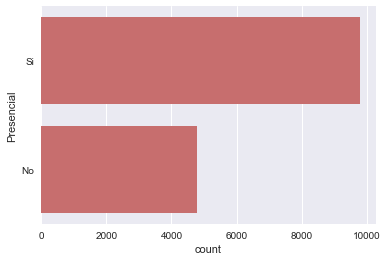

In [11]:
print(cot_all.Presencial.isnull().sum())
ver_atributo_categorico(cot_all,'Presencial')

### 1.2.7 Region

0


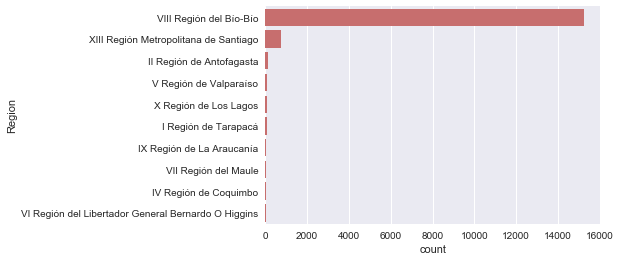

In [12]:
print(cot_all.Region.isnull().sum())
ver_atributo_categorico(cot_all,'Region',lim=10,limit=True)

### 1.2.8 Provincia

0


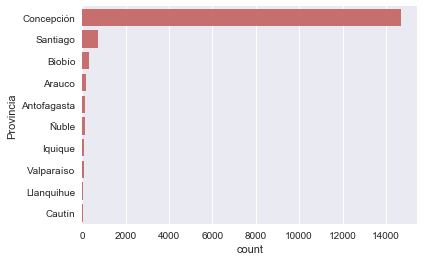

In [13]:
print(cot_all.Provincia.isnull().sum())
ver_atributo_categorico(cot_all,'Provincia',lim=10,limit=True)

### 1.2.9 Comuna

0


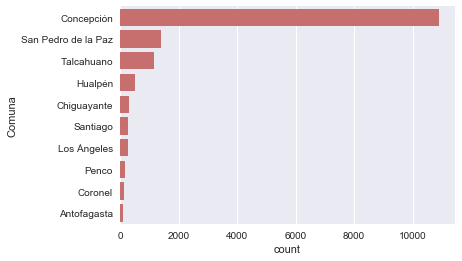

In [14]:
print(cot_all.Comuna.isnull().sum())
ver_atributo_categorico(cot_all,'Comuna',lim=10,limit=True)

### 1.2.10 Estado Civil

2049


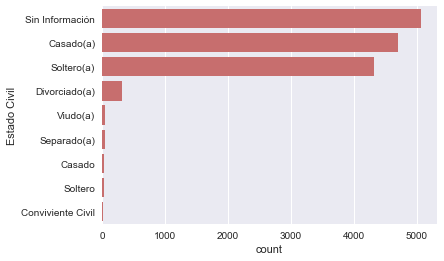

In [15]:
print(cot_all['Estado Civil'].isnull().sum())
ver_atributo_categorico(cot_all,'Estado Civil')

### 1.2.11 Etapa

0


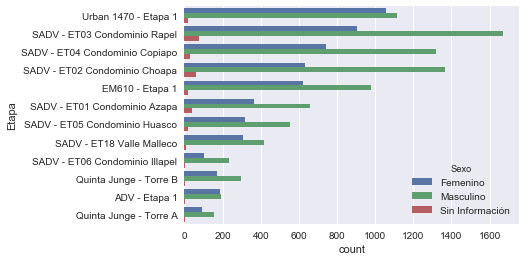

In [16]:
print(cot_all.Etapa.isnull().sum())
palette=["C0","C1","C2"]
ver_atributo_categorico(cot_all,'Etapa',hue='Sexo',palette=palette)

### 1.2.12 Actividad

2350
7 ['Tecnico', 'Empleado', 'Profesional', 'Independiente (no profesional)', nan, 'Dueña de casa', 'Estudiante']


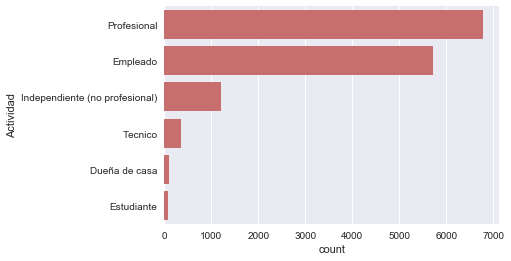

In [17]:
print(cot_all.Actividad.isnull().sum())
ver_atributo_categorico(cot_all,'Actividad',log=True, limit = True, lim=30)

### 1.2.13 Nro Grupo Familiar

5964


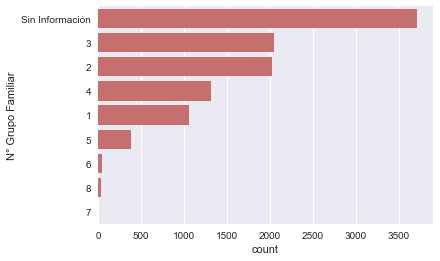

In [18]:
print(cot_all['N° Grupo Familiar'].isnull().sum())
ver_atributo_categorico(cot_all,'N° Grupo Familiar')

### 1.2.14 Cargo

13771


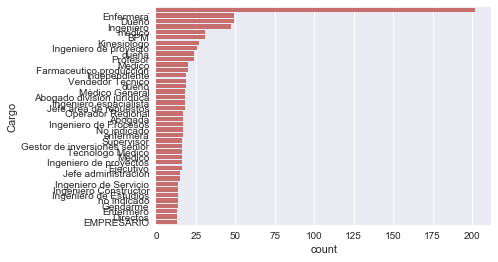

In [19]:
print(cot_all['Cargo'].isnull().sum())
ver_atributo_categorico(cot_all,'Cargo',limit=True,lim=40)

### 1.2.15 Situacion Laboral

12795


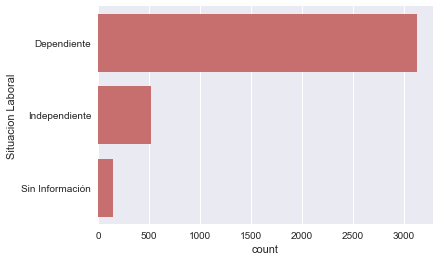

In [20]:
print(cot_all['Situacion Laboral'].isnull().sum())
ver_atributo_categorico(cot_all,'Situacion Laboral')

### 1.2.16 Nacionalidad

11744


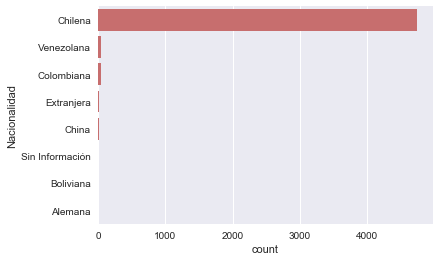

In [21]:
print(cot_all.Nacionalidad.isnull().sum())
ver_atributo_categorico(cot_all,'Nacionalidad')

### 1.2.17 Empleador

13588


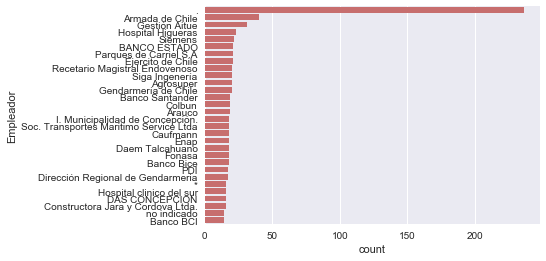

In [22]:
print(cot_all.Empleador.isnull().sum())
ver_atributo_categorico(cot_all,'Empleador',log=False, limit = True, lim=30)

### 1.2.18 Profesion

9226
130 [nan, 'Empresario', 'Constructor Civil', 'Traductor e Interprete', 'Matrona', 'Odontólogo', 'Profesor', 'Ingeniería en Biotecnología', 'Otro', 'Ingeniero Eléctrico', 'Técnico en Construcción', 'Fonoaudiólogo', 'Diseño Industrial', 'Mecánico Industrial', 'Empleado Público', 'Enfermería', 'Ingeniero en Administración', 'Contador Auditor', 'Ingeniero Comercial', 'Ingeniero en Construcción', 'Ingeniero', 'Empleado', 'Agronomo', 'Prevencionista de Riesgos', 'Ingeniero Civil Química', 'Administrador', 'Ingeniero Civil Industrial', 'Nutrición y Dietética', 'Tecnólogo Médico', 'Abogado', 'Médico', 'Educadora de Párvulos', 'Administrador Público', 'Periodista', 'Ingeniero de Ejecución', 'Psicólogo', 'Arquitecto', 'Ingeniero Civil Electrónico', 'Ingeniero en Prevención de Riesgo', 'Ingeniero Civil Eléctrico', 'Vendedor', 'Pastor', 'Administración de Empresas', 'Administrativo', 'Docente', 'Ingeniero Agronomo', 'Trabajo Social', 'Ingeniero Biomédica', 'Dueña De Casa', 'Ingeniero Civil en

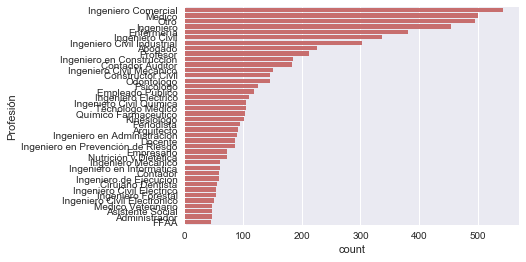

In [39]:
print(cot_all['Profesión'].isnull().sum())
ver_atributo_categorico(cot_all,'Profesión',log=True, limit = True, lim=40)

### 1.2.19 Tipo Cliente

1
3 ['Natural', 'Jurídico', nan]


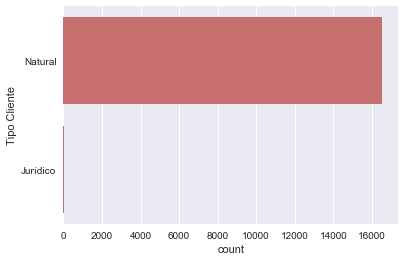

In [24]:
print(cot_all['Tipo Cliente'].isnull().sum())
ver_atributo_categorico(cot_all,'Tipo Cliente',log=True, limit = True, lim=20)

### 1.2.20 Antiguedad Laboral

172
36 [0.0, 1.0, 5.0, 2.0, 29.0, 6.0, 3.0, 37.0, 7.0, 13.0, nan, 9.0, 11.0, 10.0, 15.0, 4.0, 20.0, 22.0, 12.0, 8.0, 40.0, 31.0, 18.0, 17.0, 32.0, 16.0, 27.0, 14.0, 24.0, 23.0, 33.0, 19.0, 28.0, 21.0, 30.0, 100.0]


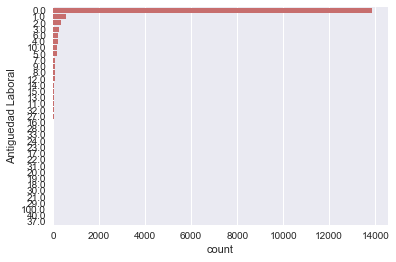

In [25]:
print(cot_all['Antiguedad Laboral'].isnull().sum())
ver_atributo_categorico(cot_all,'Antiguedad Laboral',log=True)

11384


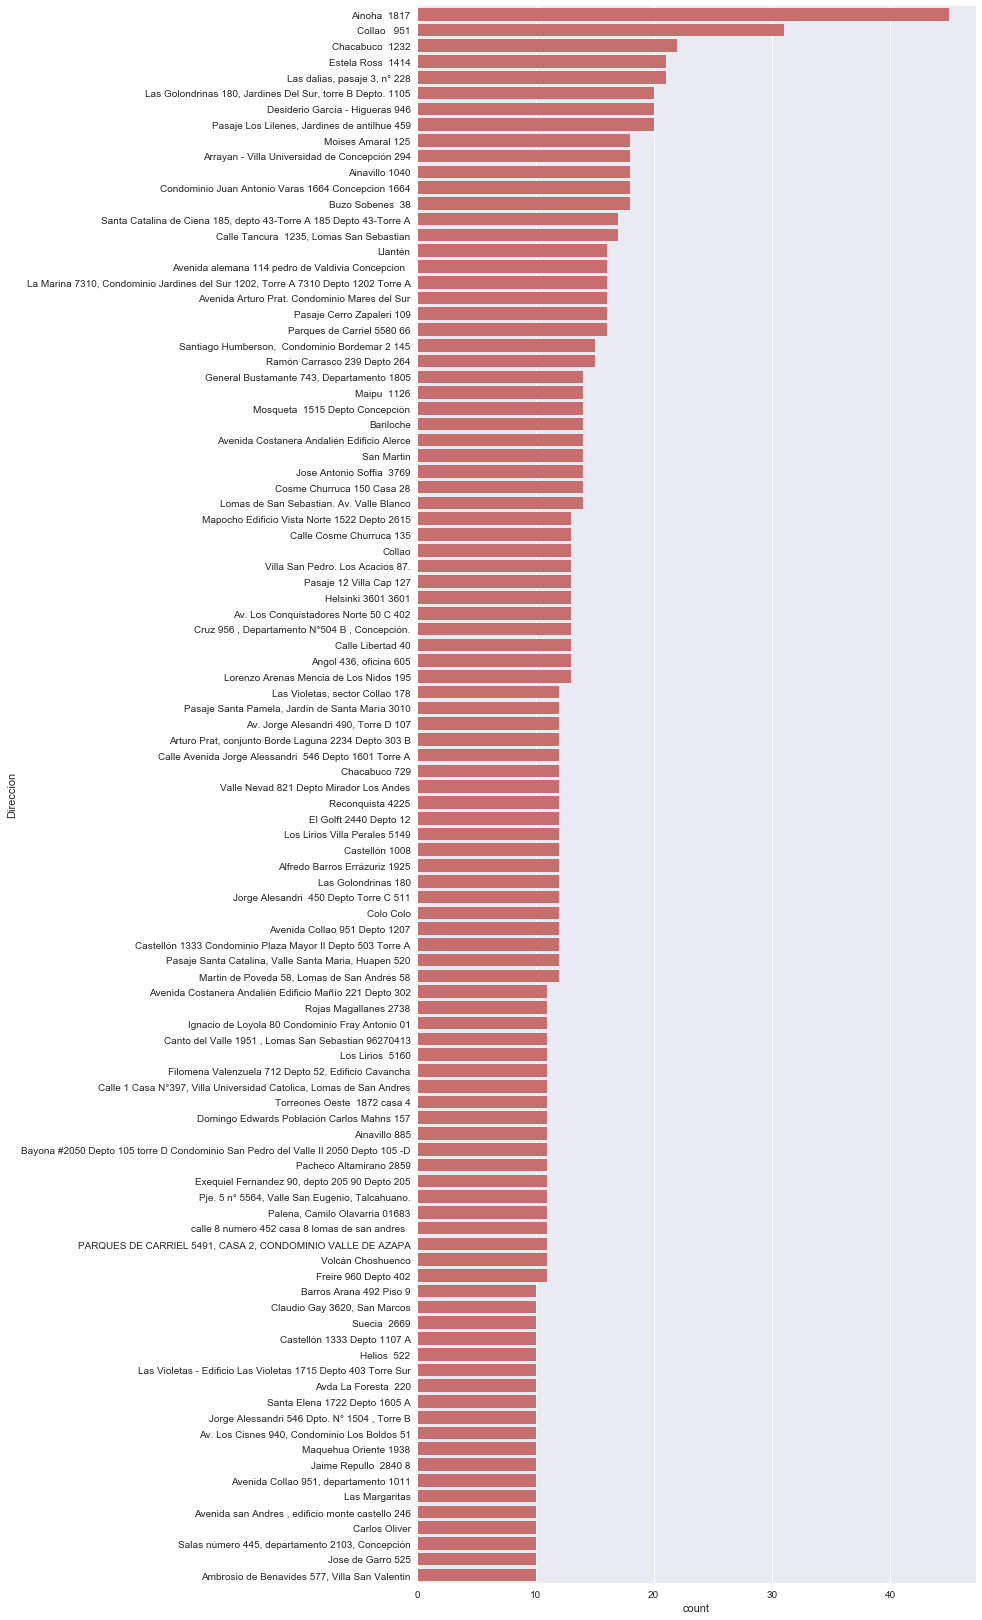

In [26]:
print(cot_all['Direccion'].isnull().sum())
f = plt.figure(figsize=(10,29))
ver_atributo_categorico(cot_all,'Direccion',log=False,lim=100, limit=True)

In [27]:
#rows
df = cot_all
print("Filas: ",df.shape[0])
print("Columnas: ",df.shape[1])
print("Primer Registro: ",(pd.to_datetime(df['Fecha Cotizacion'].tolist()).min()))
print("Ultimo Registro: ",pd.to_datetime(df['Fecha Cotizacion'].tolist()).max())
print("Ruts Unicos: ",len(df['RUT'].unique()))

Filas:  16592
Columnas:  41
Primer Registro:  2013-08-19 16:58:26
Ultimo Registro:  2018-05-22 13:42:53
Ruts Unicos:  6184


In [28]:
# Cuantas personas no entregaron su profesion
print(len(cot_all.RUT.unique()),cot_all.shape[0])
print(len(cot_all.dropna(axis=0,subset=['Profesión']).RUT.unique()),cot_all.dropna(axis=0,subset=['Profesión']).shape[0] )

6184 16592
2251 7366


In [29]:
# Cuantas personas no entregaron su nro de grupo familiar
print(len(cot_all.RUT.unique()),cot_all.shape[0])
print(len(cot_all.dropna(axis=0,subset=['N° Grupo Familiar']).RUT.unique())
      ,cot_all.dropna(axis=0,subset=['N° Grupo Familiar']).shape[0] )

6184 16592
3579 10628


In [30]:
cot_all.dropna(axis=1)

,ID,Fecha Cotizacion,Medio,Proyecto,Etapa,Jefe Comercial,Ejecutivo Comercial,RUT,Nombre,Nombre Completo,Region,Provincia,Comuna
0,111502,2017-07-27 15:46:54.000,RECORRIDO POR EL SECTOR,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Graciela Pareja Cancino,14273551-2,Nelda Del Carmen,Nelda Del Carmen Rojas Ulloa,VIII Región del Bío-Bío,Concepción,Concepción
1,111611,2017-07-29 13:37:05.000,RECONTACTO,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Lilian Harrison,13309954-9,Cecilia,Cecilia Sepulveda Torres,VIII Región del Bío-Bío,Concepción,Concepción
2,111629,2017-07-29 16:41:15.000,RECORRIDO POR EL SECTOR,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Ingrid Bello Mellado,14583354-k,Yeni,Yeni Burgos Manriquez,VIII Región del Bío-Bío,Concepción,Concepción
3,111766,2017-07-31 11:01:57.000,RECONTACTO,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Lilian Harrison,7188659-k,Maria Mercedes,Maria Torres Martinez,VIII Región del Bío-Bío,Concepción,Concepción
4,111794,2017-07-31 15:52:32.000,RECORRIDO POR EL SECTOR,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Graciela Pareja Cancino,13377606-0,John Rodrigo,John Rodrigo Fuentes Gajardo,VIII Región del Bío-Bío,Ñuble,Chillán
5,111992,2017-08-02 18:01:42.000,INTERNET,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Lilian Harrison,16863328-9,Zarah,Zarah Lobos l,VIII Región del Bío-Bío,Concepción,Concepción
6,112032,2017-08-03 11:32:31.517,INTERNET,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Lilian Harrison,17046821-k,Helena,Helena Villouta .,VIII Región del Bío-Bío,Concepción,Concepción
7,112044,2017-08-03 12:47:30.930,INTERNET,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Lilian Harrison,17046821-k,Helena,Helena Villouta .,VIII Región del Bío-Bío,Concepción,Concepción
8,112157,2017-08-04 17:18:26.000,REFERIDOS,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Lilian Harrison,13951239-1,Carlos,Carlos Santa María .,VIII Región del Bío-Bío,Concepción,Concepción
9,112638,2017-08-10 19:19:25.000,RECORRIDO POR EL SECTOR,Altos del Valle,ADV - Etapa 1,Alejandra Pooley Flores,Graciela Pareja Cancino,12920930-5,Leslie Andrea,Leslie Andrea Espinoza Campos,VIII Región del Bío-Bío,Concepción,Concepción


## Checking malformed values in attribute

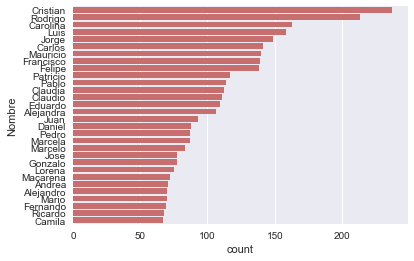

In [31]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Nombre', limit = True, lim=30)
f.savefig('..\\img\\nombre_check.png',bbox_inches='tight')

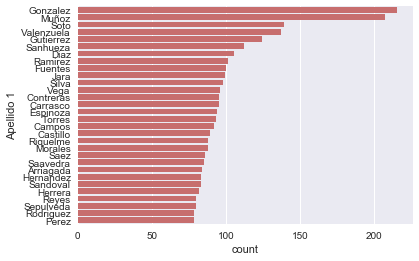

In [32]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Apellido 1', limit = True, lim=30)
f.savefig('..\\img\\apellido1_check.png',bbox_inches='tight')

1666 ['Ulloa', 'Torres', 'Manriquez', 'Martinez', 'Gajardo', 'l', '.', 'Campos', 'Fica', 'Pineda', 'Erle', 'Vega', 'Casanova', 'Villegas', 'Herrera', 'Rodriguez', 'Lopez', 'Oliva', 'Cabezas', 'Figueroa', 'Lobos', 'Sanchez', 'Becerra', 'Reyes', 'Miranda', 'Vergara', 'Marianjel', 'Acuña', '*', 'Paredes', 'Larenas', 'Seguek', 'Olivares', '-', 'Guzman', 'Molina', 'Opazo', 'Vilugrón', '..', 'Esparza', 'Vivanco', 'Silva', 'Brañas', 'Quiroga', 'Mora', 'Rojas', 'Nuñez', 'Lazo', 'Ortiz', 'Sandoval', 'Höger', 'Araya', 'Ramirez', 'Cadenas', 'Vera', 'Contreras', 'Hoffmann', 'Cartes', 'Mahuzier', 'Salaberri', 'Hernandez', 'Flores', 'Ilufin', 'Sorensen', 'Romero', 'Jara', 'Suazo', 'Orellana', 'Navarrete', 'Roman', 'Pinto', 'Cottet', 'Irribarra', 'Lecaros', nan, 'Mella', 'Arevalo', 'Aguilera', 'Rios', 'Bolados', 'Vallejos', 'Maldonado', 'Sanchéz', 'Neira', 'Castillo', 'carter', 'Bobadilla', 'Ortega', 'Avello', 'Carmona', 'Carvallo', 'Valenzuela', 'Revello', 'Adonis', 'Martínez', 'Cifuentes', 'Cabrera

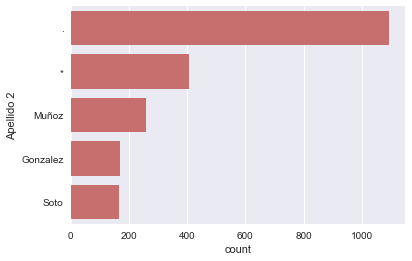

In [33]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Apellido 2',log=True, limit = True, lim=5)
f.savefig('..\\img\\apellido2_check.png',bbox_inches='tight')

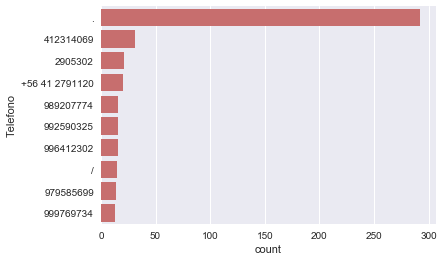

In [34]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Telefono', limit = True, lim=10)
f.savefig('..\\img\\telefono_check.png',bbox_inches='tight')

6038 [953748134, 76374699, 968441156, 2990590, 981372543, 90834457, 958295551, 995072841, 92449494, 942522023, 984192601, 98836621, 956181171, 85480235, 92493350, 968960554, 991280936, 988894560, 94007891, 956282212, 991299568, 988289650, 979575691, 95209394, 993118503, 88305206, 98873258, 95123765, 999684600, 962374072, 93206658, 98446361, 982314411, 987367733, 9981556548, 52080367, 76694924, 994698200, 981496410, 78995130, 950702404, 93090821, 2225841, 964427332, 994486955, 57568731, 981987470, 992953522, 97955039, 975361247, 74540483, 998279335, 987690273, 982085008, 77934502, 990938143, 998472754, 95990362, 974771402, 974878745, 950196206, 982347427, 964328618, 991390292, 961611186, 65991253, 98717377, 981385833, 942051491, 998847907, 942132618, 996412302, 956787113, '+56 9 61227693', 998950598, 99697471, 86651069, 982788710, 95395290, 82344634, 993443523, 89711239, 99999999, 99496404, '+56 9 75181074', 956675683, 990604760, 92749284, 968989297, 99356039, 98760877, 82995455, 981902

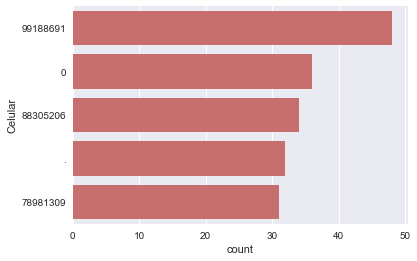

In [35]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Celular',log=True, limit = True, lim=5)
f.savefig('..\\img\\celular_check.png',bbox_inches='tight')

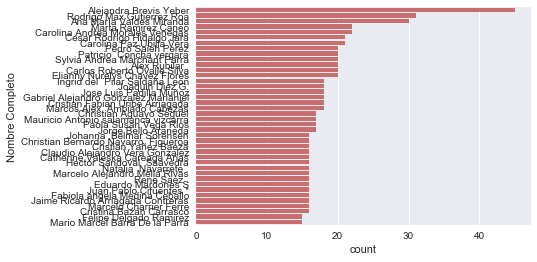

In [36]:
f = plt.figure()
ver_atributo_categorico(cot_all,'Nombre Completo', limit = True, lim=40)
f.savefig('..\\img\\nombrecompleto_check.png',bbox_inches='tight')

In [37]:
print("Cot rut promedio: ",get_col_group_description(df,'RUT')['mean'])
print("Cot rut desviacion: ",get_col_group_description(df,'RUT')['std'])
print("Cot por rut maximo: ",get_col_group_description(df,'RUT')['max'])


NameError: name 'get_col_group_description' is not defined

### 2.4.Describe Data Combined Files: Negociacion

In [ ]:
#columns droped 'Fecha Promesa', 'Telefono', 'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion', 
# 'Resciliacion por Modificacion', 'Motivo Desis/Resc', 'Description Desis/Resc'

#columnas no importantes para el sgte paso
unimportant_columns = ['Apellido 1','Apellido 2','Celular','Ejecutivo Comercial','Region','Provincia','Jefe Comercial','ID']
to_select_cols = df.count().sort_values(ascending=True).index.tolist()
to_select_cols = to_select_cols[8:]
to_select_cols = [item for item in to_select_cols if item not in unimportant_columns]
# to_select_cols